In [2]:
%matplotlib inline

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
import qtl.io

import umap
import scipy
from scipy import stats
from sklearn import preprocessing
import itertools

import re

In [3]:
def qq_plot_log10(p_values, title=''):
    p_values = sorted(p_values)
    
    # Assign normalized ranks to sorted p-values
    ranks = (np.array(range(len(p_values))) + 1) / float(len(p_values))
    log_ranks = -np.log10(ranks)
    log_p_values = -np.log10(p_values)
    print (len(log_ranks))
    print (len(log_p_values))
    plt.figure(figsize=(5, 5))
    ax = plt.gca()
    ax.plot([0, max(log_ranks)], [0, max(log_ranks)], linestyle='dashed', color='k')
    ax.scatter(x=log_ranks, y=log_p_values, s=1)
    ax.set_title(title)
    ax.set_xlabel('Expected quantile')
    ax.set_ylabel('Observed quantile')

In [15]:
def make_volcano_plot(df, title=''):
    plt.figure(figsize=(10,10))
    p1 = sns.scatterplot(df['logFC'],df['log10P'],hue=df['sig'])
    
    #p1 = sns.scatterplot(df['log2FoldChange'],df['log10P'],hue=df['sig'])
    sns.set(font_scale=1.0)

    for line in range(0,df.shape[0]):
        if (df.sig[line] == True):
            p1.text(df.logFC[line]+0.01, df.log10P[line],  
             df.Description[line], horizontalalignment='left', 
             size='small', color='black')

    plt.title('Volcano plot')

In [16]:
RA_genes_list = pd.read_csv('kmt2c_vs_other_sva_changing_svs_110623.csv',index_col=0)
RA_genes_list.sort_values(by=['adj.P.Val']).head(20)

,Description,logFC,AveExpr,t,P.Value,adj.P.Val,B
11233,TTC6,-1.721495,3.361535,-6.463259,1.356313e-09,0.000023,11.475758
3522,CCDC58,-0.764938,4.590328,-5.314753,3.798038e-07,0.001825,6.253972
1977,BCYRN1,-2.734517,3.697182,-5.303713,3.996623e-07,0.001825,6.183426
6172,ESR1,-2.521577,6.822333,-5.243893,5.261656e-07,0.001825,5.931376
3906,MFI2-AS1,-2.072524,2.242488,-5.236685,5.438194e-07,0.001825,5.698634
10147,STK38L,0.848573,5.784563,5.200990,6.401059e-07,0.001825,5.734973
9572,AP000439.3,3.960863,-2.616756,5.129901,8.837574e-07,0.002160,3.686797
1822,DTNB,-1.081069,4.024662,-5.053993,1.243221e-06,0.002540,5.152415
12498,RRN3P3,-1.356902,3.049414,-5.032903,1.366082e-06,0.002540,5.027828
5725,SCUBE3,-2.218170,2.780046,-4.993041,1.631292e-06,0.002540,4.824758


In [24]:
RA_genes_list[RA_genes_list['Description'] == 'SPP1']

,Description,logFC,AveExpr,t,P.Value,adj.P.Val,B
4248,SPP1,0.871219,7.162713,1.471102,0.143359,0.592023,-5.384884


In [25]:
RA_genes_list[RA_genes_list['Description'] == 'PAK1']

,Description,logFC,AveExpr,t,P.Value,adj.P.Val,B
9647,PAK1,0.351002,6.232709,1.319512,0.189009,0.642623,-5.580508


17108
17108


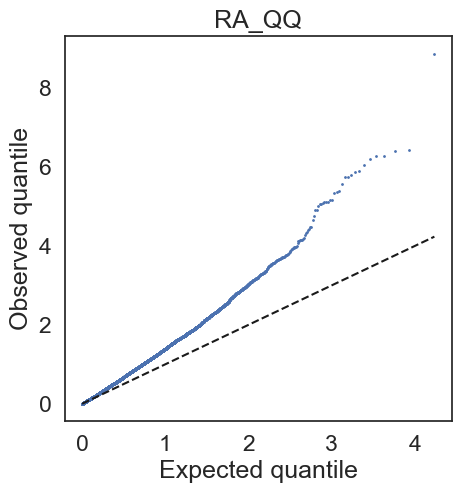

In [26]:
qq_plot_log10(RA_genes_list['P.Value'], title='RA_QQ')

/Users/lmartin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


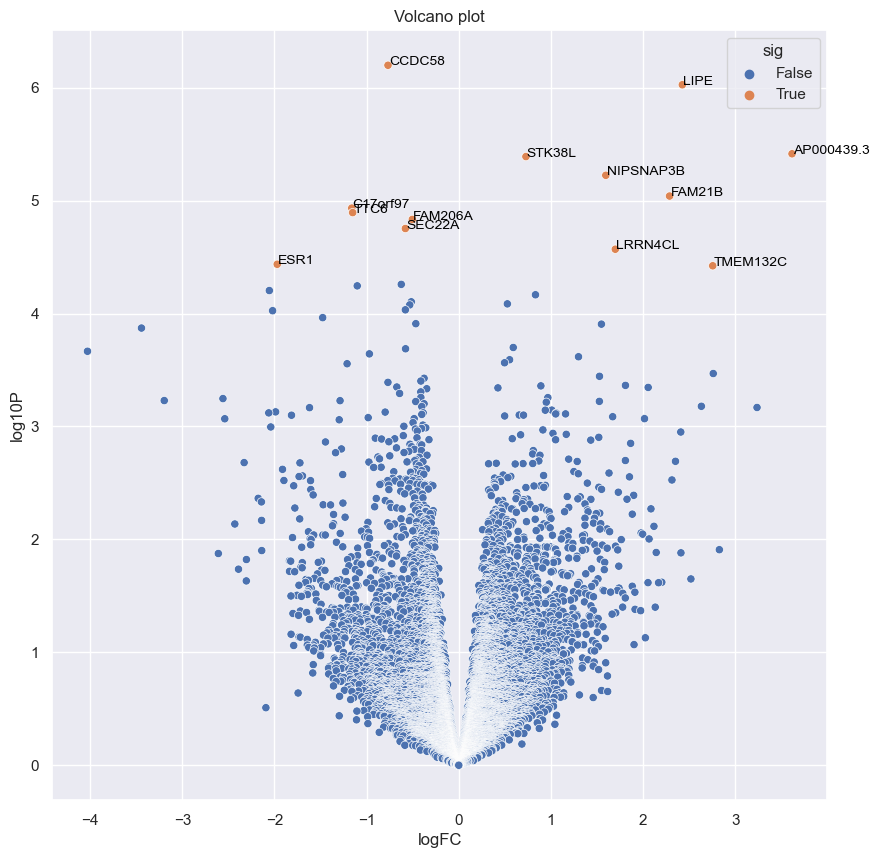

In [11]:
RA_genes_list['log10P'] = -np.log10(RA_genes_list['P.Value'])
RA_genes_list['sig'] = RA_genes_list['adj.P.Val'] < 0.05
RA_genes_list_sig = RA_genes_list[RA_genes_list['sig'] == True]
RA_genes_list = RA_genes_list.reset_index()

RA_genes_list.sort_values(by='adj.P.Val')

make_volcano_plot(RA_genes_list,title='RA volcano')

## GSEA Figure

### inputs

In [17]:
fgsea_res_under_tx = pd.read_csv("~/Documents/2023/Experimental_RNA_seq/experimental_kmt2c_fgseaRes_hallmark_fulv.csv")
## remove "hallmark" from pathway
pathway_list = fgsea_res_under_tx['pathway'].to_list()

path_no_prefix = [' '.join(path.split('_')[1:]) for path in pathway_list]
fgsea_res_under_tx['pathway'] = path_no_prefix
fgsea_res_under_tx = fgsea_res_under_tx.sort_values(by=['NES'],ascending=False)

In [18]:
fgsea_res_under_tx[fgsea_res_under_tx['padj'] < 0.05]

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
12,E2F TARGETS,1.000000e-75,7.700000e-74,NaN,0.847842,3.474455,197,TOP2A|LMNB1|ATAD2|MKI67|MYBL2|CDK1|MCM6|HMGB2|...
17,G2M CHECKPOINT,8.670000e-58,2.120000e-56,NaN,0.807771,3.309347,193,TOP2A|LMNB1|MKI67|MYBL2|CDK1|TPX2|NUSAP1|KIF11...
31,MYC TARGETS V1,3.154469e-40,5.257449e-39,1.653315,0.736468,3.019869,196,MCM6|PCNA|CCNA2|DEK|CDC20|KPNA2|MAD2L1|RRM1|MC...
30,MTORC1 SIGNALING,1.276861e-17,1.596076e-16,1.086441,0.602873,2.462639,190,SCD|RRM2|BUB1|AURKA|STC1|SLC1A5|DHFR|ALDOA|GAP...
42,SPERMATOGENESIS,8.563835e-10,6.117025e-09,0.801216,0.665513,2.374076,66,CDK1|NEK2|BUB1|AURKA|CCNB2|SLC12A2|KIF2C|CNIH2...
35,OXIDATIVE PHOSPHORYLATION,1.256580e-15,1.256580e-14,1.017545,0.575210,2.356964,195,SLC25A5|LDHA|NNT|ATP5B|GPI|ATP5A1|CASP7|CPT1A|...
29,MITOTIC SPINDLE,8.751382e-14,7.292818e-13,0.954542,0.554073,2.271961,196,TOP2A|LMNB1|CDK1|TPX2|ECT2|NUSAP1|KIF11|CENPF|...
32,MYC TARGETS V2,2.769854e-06,1.259025e-05,0.627257,0.611106,2.122329,58,PLK1|PLK4|TMEM97|MCM5|MCM4|HSPD1|PA2G4|UNG|CDK...
15,ESTROGEN RESPONSE LATE,1.502025e-08,9.387656e-08,0.733762,0.506135,2.042596,169,TOP2A|CDC6|CCND1|RNASEH2A|CDC20|RET|GINS2|KIF2...
11,DNA REPAIR,1.379044e-07,6.895221e-07,0.690132,0.515970,2.030828,137,PCNA|POLD3|RAD51|SDCBP|TYMS|PRIM1|HPRT1|ARL6IP...


In [19]:
#fgsea_res_bulk_RA = pd.read_csv("~/Documents/2023/bulk_rna_reanlaysis/all_kmt2c_vs_not_hallmark_fgseaRes.tsv",sep='\t')
fgsea_res_bulk_RA = pd.read_csv("kmt2c_vs_not_sva_relabel_110623_changing_svs_fgseaRes.tsv",sep='\t')
## remove "hallmark" from pathway
pathway_list = fgsea_res_bulk_RA['pathway'].to_list()

path_no_prefix = [' '.join(path.split('_')[1:]) for path in pathway_list]
fgsea_res_bulk_RA['pathway'] = path_no_prefix
fgsea_res_bulk_RA = fgsea_res_bulk_RA.sort_values(by=['NES'],ascending=False)


In [20]:
fgsea_res_bulk_RA[fgsea_res_bulk_RA['padj'] < 0.05]

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
13,EPITHELIAL MESENCHYMAL TRANSITION,2.924869e-17,1.462434e-15,1.067210,0.525412,2.642860,183,ITGB1 SCG2 VCAM1 SGCB FBN2 LAMA1 ADAM12 CALU C...
40,PROTEIN SECRETION,1.342380e-10,3.355951e-09,0.826657,0.545011,2.480214,92,STX7 ATP1A1 SSPN SCRN1 AP2B1 CD63 VAMP3 ARCN1 ...
4,APICAL JUNCTION,1.454938e-07,2.424897e-06,0.690132,0.396601,1.999938,184,ITGB1 VCL PARVA WASL RASA1 VCAM1 CNN2 TRO CDH6...
19,HEDGEHOG SIGNALING,1.581037e-03,7.905186e-03,0.455060,0.501483,1.811698,35,SCG2 NRP2 RASA1 RTN1 MYH9 OPHN1 CDK6 NF1 GPR56...
29,MITOTIC SPINDLE,6.875538e-05,6.875538e-04,0.538434,0.336687,1.719323,200,STK38L RASAL2 VCL WASL RASA1 RAB3GAP1 CDC42 RO...
2,ANDROGEN RESPONSE,1.179947e-03,7.374671e-03,0.455060,0.368594,1.712253,97,CDC14B XRCC5 PPAP2A ANKH XRCC6 SPCS3 H1F0 TSC2...
0,ADIPOGENESIS,1.353344e-04,1.127787e-03,0.518848,0.335822,1.693739,185,LIPE PTGER3 ITIH5 PHLDB1 LAMA4 SSPN FABP4 GPHN...
31,MYC TARGETS V1,6.808140e-05,6.875538e-04,0.538434,0.335424,1.692543,186,SF3B3 EIF4H EIF4E PSMD7 HNRNPR SERBP1 PHB2 XRC...
26,INTERFERON GAMMA RESPONSE,2.631838e-04,1.879884e-03,0.498493,0.327441,1.651472,185,TXNIP VCAM1 EPSTI1 SSPN PFKP MVP NLRC5 IFI44L ...
3,ANGIOGENESIS,1.064520e-02,3.548400e-02,0.380730,0.454222,1.622106,33,APP VCAN LPL JAG1 ITGAV POSTN SPP1 FSTL1 LRPAP...


In [64]:
fgsea_res_bulk_RA[fgsea_res_bulk_RA['padj'] < 0.1]

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
13,EPITHELIAL MESENCHYMAL TRANSITION,2.924869e-17,1.462434e-15,1.067210,0.525412,2.642860,183,ITGB1 SCG2 VCAM1 SGCB FBN2 LAMA1 ADAM12 CALU C...
40,PROTEIN SECRETION,1.342380e-10,3.355951e-09,0.826657,0.545011,2.480214,92,STX7 ATP1A1 SSPN SCRN1 AP2B1 CD63 VAMP3 ARCN1 ...
4,APICAL JUNCTION,1.454938e-07,2.424897e-06,0.690132,0.396601,1.999938,184,ITGB1 VCL PARVA WASL RASA1 VCAM1 CNN2 TRO CDH6...
19,HEDGEHOG SIGNALING,1.581037e-03,7.905186e-03,0.455060,0.501483,1.811698,35,SCG2 NRP2 RASA1 RTN1 MYH9 OPHN1 CDK6 NF1 GPR56...
29,MITOTIC SPINDLE,6.875538e-05,6.875538e-04,0.538434,0.336687,1.719323,200,STK38L RASAL2 VCL WASL RASA1 RAB3GAP1 CDC42 RO...
2,ANDROGEN RESPONSE,1.179947e-03,7.374671e-03,0.455060,0.368594,1.712253,97,CDC14B XRCC5 PPAP2A ANKH XRCC6 SPCS3 H1F0 TSC2...
0,ADIPOGENESIS,1.353344e-04,1.127787e-03,0.518848,0.335822,1.693739,185,LIPE PTGER3 ITIH5 PHLDB1 LAMA4 SSPN FABP4 GPHN...
31,MYC TARGETS V1,6.808140e-05,6.875538e-04,0.538434,0.335424,1.692543,186,SF3B3 EIF4H EIF4E PSMD7 HNRNPR SERBP1 PHB2 XRC...
26,INTERFERON GAMMA RESPONSE,2.631838e-04,1.879884e-03,0.498493,0.327441,1.651472,185,TXNIP VCAM1 EPSTI1 SSPN PFKP MVP NLRC5 IFI44L ...
3,ANGIOGENESIS,1.064520e-02,3.548400e-02,0.380730,0.454222,1.622106,33,APP VCAN LPL JAG1 ITGAV POSTN SPP1 FSTL1 LRPAP...


In [21]:
fgsea_res = pd.read_csv("~/Documents/2023/Experimental_RNA_seq/experimental_kmt2c_fgseaRes_hallmark.tsv",sep='\t')

## remove "hallmark" from pathway
pathway_list = fgsea_res['pathway'].to_list()

path_no_prefix = [' '.join(path.split('_')[1:]) for path in pathway_list]
fgsea_res['pathway'] = path_no_prefix
fgsea_res = fgsea_res.sort_values(by=['NES'],ascending=False)

In [22]:
fgsea_res[fgsea_res['padj'] < 0.05]

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
0,INTERFERON GAMMA RESPONSE,8.370000e-14,4.100000e-12,0.954542,0.599796,2.510000,NaN,NaN
1,INTERFERON ALPHA RESPONSE,2.900000e-10,7.100000e-09,0.814036,0.645563,2.440000,NaN,NaN
3,ALLOGRAFT REJECTION,6.140000e-08,7.520000e-07,0.704976,0.573299,2.210000,NaN,NaN
2,EPITHELIAL MESENCHYMAL TRANSITION,4.350000e-08,7.110000e-07,0.719513,0.542270,2.190000,NaN,NaN
4,MYOGENESIS,8.930000e-06,8.750000e-05,0.593325,0.477526,1.950000,NaN,NaN
9,COAGULATION,7.160000e-05,3.190000e-04,0.538434,0.521776,1.930000,NaN,NaN
6,UV RESPONSE UP,1.500000e-05,1.050000e-04,0.593325,0.458427,1.900000,NaN,NaN
11,IL6 JAK STAT3 SIGNALING,4.470000e-04,1.560000e-03,0.498493,0.544150,1.900000,NaN,NaN
5,XENOBIOTIC METABOLISM,1.080000e-05,8.810000e-05,0.593325,0.454210,1.890000,NaN,NaN
8,COMPLEMENT,4.200000e-05,2.060000e-04,0.557332,0.448862,1.840000,NaN,NaN


In [23]:
paths_to_plot = ['INTERFERON GAMMA RESPONSE', 'INTERFERON ALPHA RESPONSE', 'EPITHELIAL MESENCHYMAL TRANSITION',
       'MYOGENESIS', 'INFLAMMATORY RESPONSE', 'E2F TARGETS', 'MITOTIC SPINDLE', 'G2M CHECKPOINT', 'ESTROGEN RESPONSE LATE',
       'ESTROGEN RESPONSE EARLY']

In [24]:
paths_in_baseline_exp = fgsea_res[fgsea_res['pathway'].isin(paths_to_plot)]

paths_in_baseline_exp.set_index('pathway',inplace=True)
paths_in_baseline_exp = paths_in_baseline_exp.loc[paths_to_plot]
paths_in_baseline_exp.reset_index(inplace=True)

In [25]:
paths_in_RA = fgsea_res_bulk_RA[fgsea_res_bulk_RA['pathway'].isin(paths_to_plot)]

paths_in_RA.set_index('pathway',inplace=True)
paths_in_RA = paths_in_RA.loc[paths_to_plot]
paths_in_RA.reset_index(inplace=True)

In [26]:
paths_in_treated_exp = fgsea_res_under_tx[fgsea_res_under_tx['pathway'].isin(paths_to_plot)]

paths_in_treated_exp.set_index('pathway',inplace=True)
paths_in_treated_exp = paths_in_treated_exp.loc[paths_to_plot]
paths_in_treated_exp.reset_index(inplace=True)

### plotting

In [47]:
only_rd_blue_palette_cell_lines = ['#CE382B','#CE382B','#CE382B','#CE382B','#CE382B',
                        '#3771E6','#3771E6','#3771E6','#3771E6','#3771E6']

only_rd_blue_palette_ra = ['#CE382B','#CE382B','#CE382B','#CE382B','#CE382B',
                        '#3771E6','#CE382B','#3771E6','#3771E6','#3771E6']

only_rd_blue_palette_tx = ['#CE382B','#CE382B','#3771E6','#3771E6','#3771E6',
                        '#CE382B','#CE382B','#CE382B','#CE382B','#CE382B']

sns.set()
sns.set_style('white')

sns.set(font_scale=1.5)

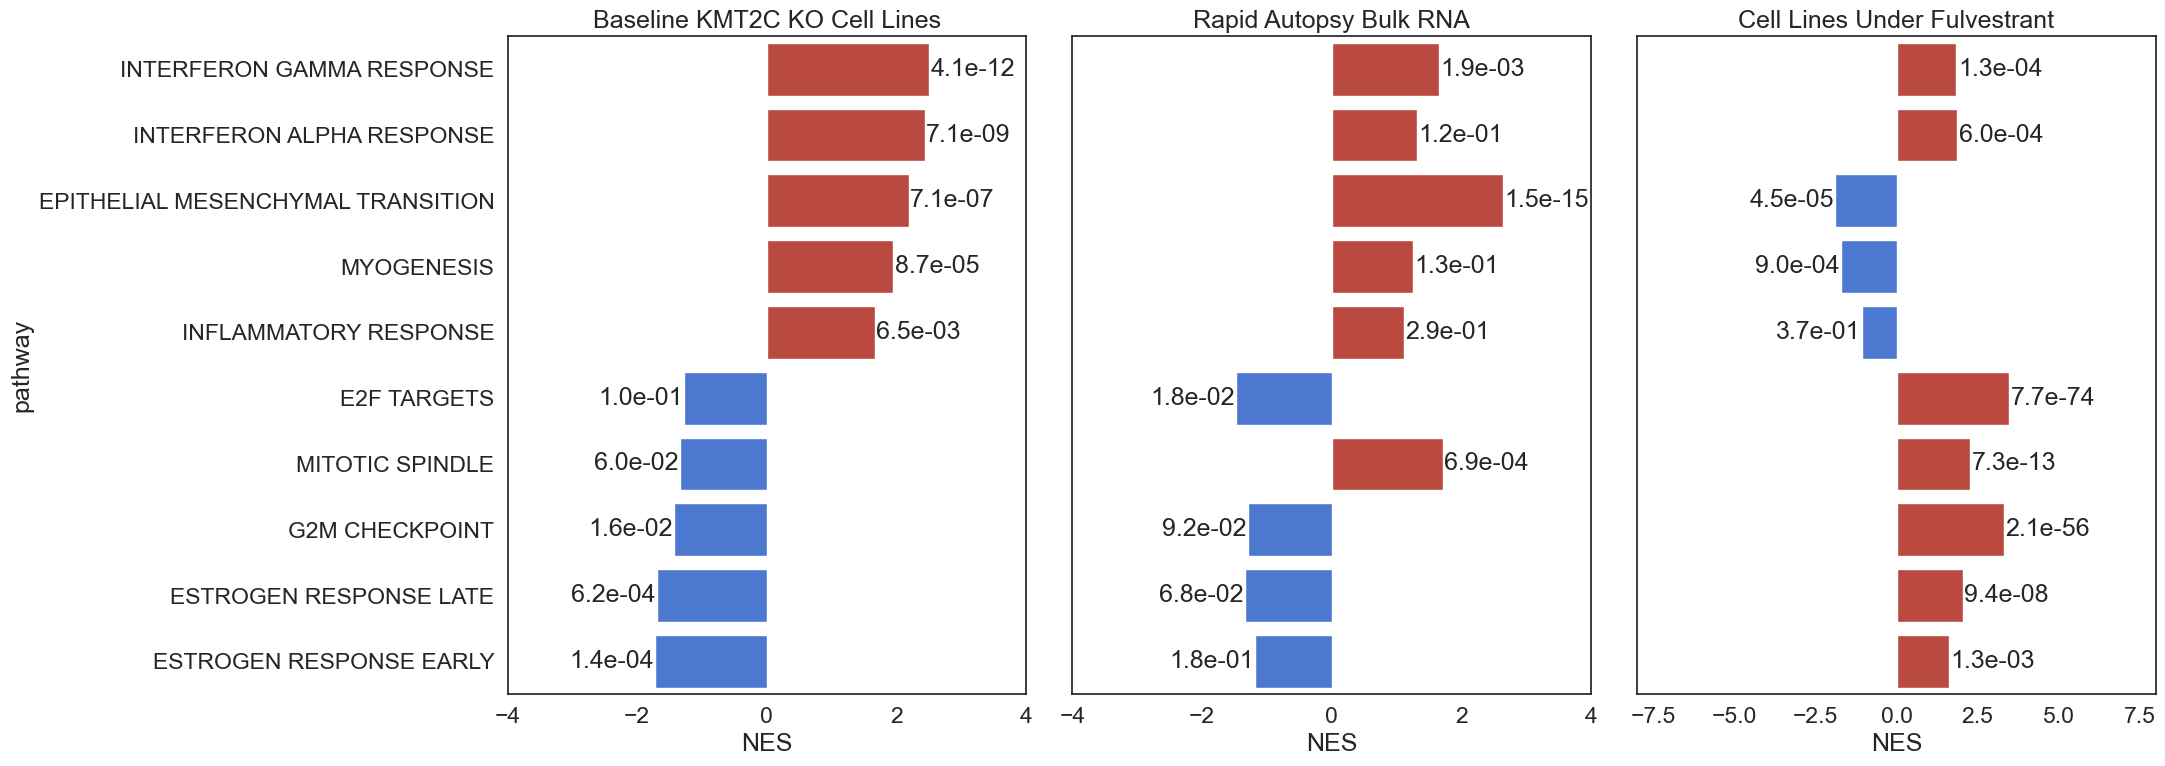

In [59]:
fig, axes = plt.subplots(ncols=3,figsize=(22,8))
rounded_pvals1 = ['{:0.1e}'.format(i) for i in list(paths_in_baseline_exp['padj'])]

snsplot1 = sns.barplot(data=paths_in_baseline_exp, x='NES' , y='pathway',
          palette=only_rd_blue_palette_cell_lines,ax=axes[0])
 
snsplot1.set_xlim(-4,4)
for container in snsplot1.containers:
    snsplot1.bar_label(container, labels=rounded_pvals1, label_type='edge',padding=1)
    
#snsplot1.margins(y=0.0)
snsplot1.set(title='Baseline KMT2C KO Cell Lines')

rounded_pvals2 = ['{:0.1e}'.format(i) for i in list(paths_in_RA['padj'])]

snsplot2 =sns.barplot(data=paths_in_RA, x='NES' , y='pathway',
           palette=only_rd_blue_palette_ra,ax=axes[1])

snsplot2.set(yticklabels=[])
snsplot2.set(ylabel=None)

snsplot2.set_xlim(-4,4)
for container in snsplot2.containers:
    snsplot2.bar_label(container, labels=rounded_pvals2, label_type='edge',padding=1)
    
#snsplot2.margins(y=0.01)
snsplot2.set(title='Rapid Autopsy Bulk RNA')

rounded_pvals3 = ['{:0.1e}'.format(i) for i in list(paths_in_treated_exp['padj'])]

snsplot3 = sns.barplot(data=paths_in_treated_exp, x='NES' , y='pathway',palette=only_rd_blue_palette_tx,ax=axes[2])

snsplot3.set(yticklabels=[])
snsplot3.set(ylabel=None)

snsplot3.set_xlim(-8,8)
for container in snsplot3.containers:
    snsplot3.bar_label(container, labels=rounded_pvals3, label_type='edge',padding=1)
#snsplot3.margins(y=0.01)
sns.set_style('white')
snsplot3.set(title='Cell Lines Under Fulvestrant')
fig.tight_layout()
fig.savefig('all_GSEA_plots_one_panel_110623.svg')

## Just Cell Lines and RA plots

In [29]:
only_rd_blue_palette_cell_lines = ['#CE382B','#CE382B','#CE382B','#CE382B','#CE382B',
                        '#3771E6','#3771E6','#3771E6','#3771E6','#3771E6']

only_rd_blue_palette_ra = ['#CE382B','#CE382B','#CE382B','#CE382B','#CE382B',
                        '#3771E6','#CE382B','#3771E6','#3771E6','#3771E6']

sns.set()
sns.set_style('white')

sns.set(font_scale=1.5) 

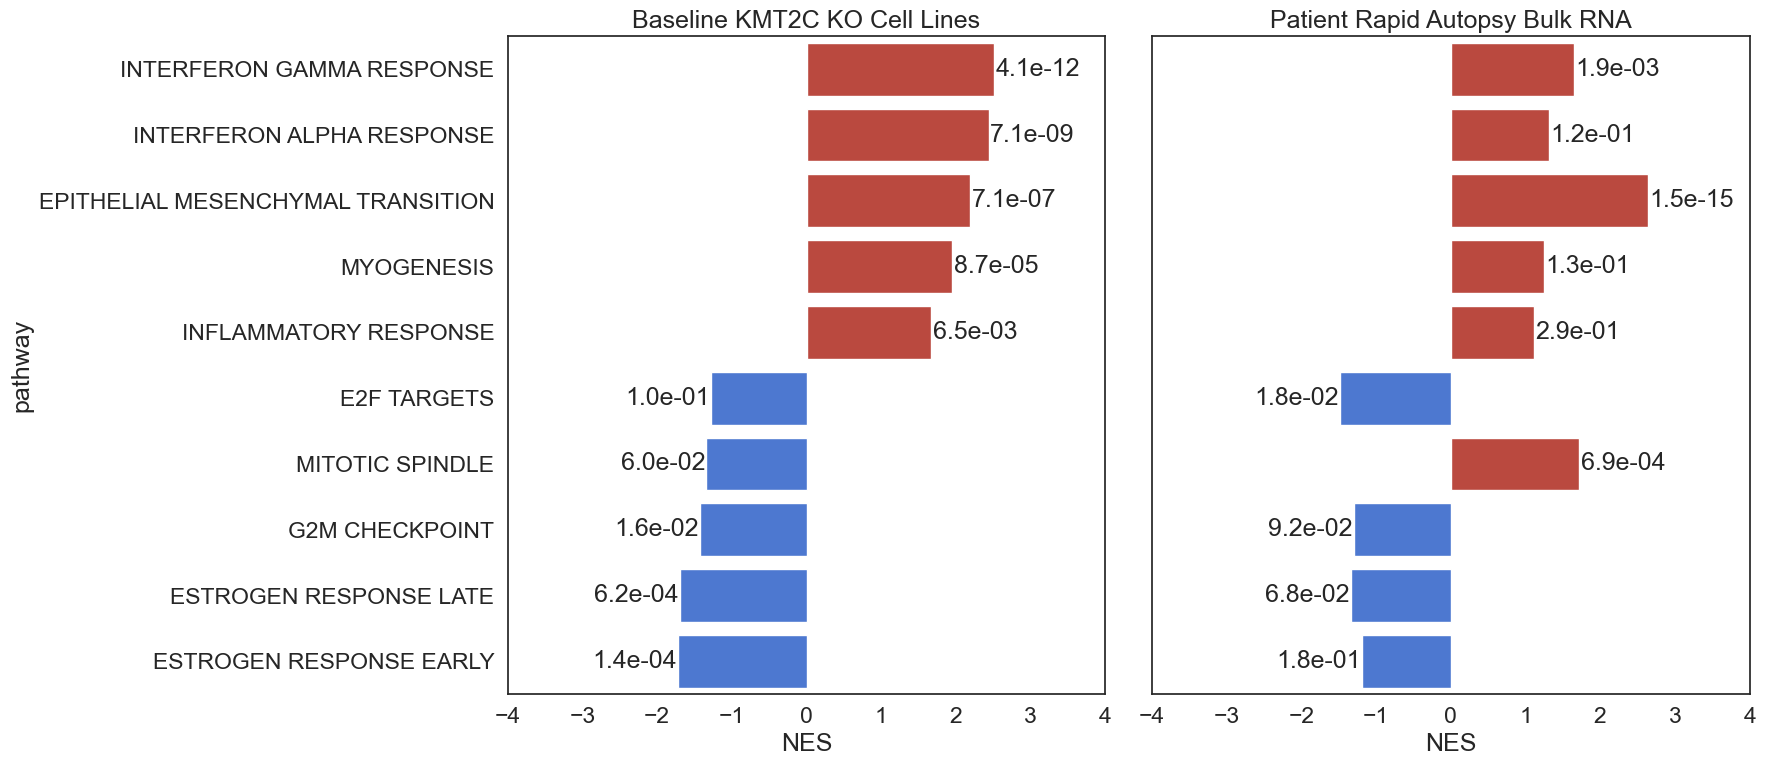

In [33]:
fig, axes = plt.subplots(ncols=2,figsize=(18,8))
rounded_pvals1 = ['{:0.1e}'.format(i) for i in list(paths_in_baseline_exp['padj'])]

snsplot1 = sns.barplot(data=paths_in_baseline_exp, x='NES' , y='pathway',
          palette=only_rd_blue_palette_cell_lines,ax=axes[0])
 
snsplot1.set_xlim(-4,4)
for container in snsplot1.containers:
    snsplot1.bar_label(container, labels=rounded_pvals1, label_type='edge',padding=1)
    
#snsplot1.margins(y=0.0)
snsplot1.set(title='Baseline KMT2C KO Cell Lines')

rounded_pvals2 = ['{:0.1e}'.format(i) for i in list(paths_in_RA['padj'])]

snsplot2 =sns.barplot(data=paths_in_RA, x='NES' , y='pathway',
           palette=only_rd_blue_palette_ra,ax=axes[1])

snsplot2.set(yticklabels=[])
snsplot2.set(ylabel=None)

snsplot2.set_xlim(-4,4)
for container in snsplot2.containers:
    snsplot2.bar_label(container, labels=rounded_pvals2, label_type='edge',padding=1)
    
#snsplot2.margins(y=0.01)
snsplot2.set(title='Patient Rapid Autopsy Bulk RNA')
sns.set_style('white')
fig.tight_layout()
fig.savefig('CellLines_RA_GSEA_plots_111523.svg')

## Separate plot for under treatment cells

In [38]:
under_tx_most_sig_results_pos = fgsea_res_under_tx.head(10)
under_tx_most_sig_results_neg = fgsea_res_under_tx.tail(10)

In [39]:
under_tx_most_sig_results_pos

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
12,E2F TARGETS,1.000000e-75,7.700000e-74,NaN,0.847842,3.474455,197,TOP2A|LMNB1|ATAD2|MKI67|MYBL2|CDK1|MCM6|HMGB2|...
17,G2M CHECKPOINT,8.670000e-58,2.120000e-56,NaN,0.807771,3.309347,193,TOP2A|LMNB1|MKI67|MYBL2|CDK1|TPX2|NUSAP1|KIF11...
31,MYC TARGETS V1,3.154469e-40,5.257449e-39,1.653315,0.736468,3.019869,196,MCM6|PCNA|CCNA2|DEK|CDC20|KPNA2|MAD2L1|RRM1|MC...
30,MTORC1 SIGNALING,1.276861e-17,1.596076e-16,1.086441,0.602873,2.462639,190,SCD|RRM2|BUB1|AURKA|STC1|SLC1A5|DHFR|ALDOA|GAP...
42,SPERMATOGENESIS,8.563835e-10,6.117025e-09,0.801216,0.665513,2.374076,66,CDK1|NEK2|BUB1|AURKA|CCNB2|SLC12A2|KIF2C|CNIH2...
35,OXIDATIVE PHOSPHORYLATION,1.256580e-15,1.256580e-14,1.017545,0.575210,2.356964,195,SLC25A5|LDHA|NNT|ATP5B|GPI|ATP5A1|CASP7|CPT1A|...
29,MITOTIC SPINDLE,8.751382e-14,7.292818e-13,0.954542,0.554073,2.271961,196,TOP2A|LMNB1|CDK1|TPX2|ECT2|NUSAP1|KIF11|CENPF|...
32,MYC TARGETS V2,2.769854e-06,1.259025e-05,0.627257,0.611106,2.122329,58,PLK1|PLK4|TMEM97|MCM5|MCM4|HSPD1|PA2G4|UNG|CDK...
15,ESTROGEN RESPONSE LATE,1.502025e-08,9.387656e-08,0.733762,0.506135,2.042596,169,TOP2A|CDC6|CCND1|RNASEH2A|CDC20|RET|GINS2|KIF2...
11,DNA REPAIR,1.379044e-07,6.895221e-07,0.690132,0.515970,2.030828,137,PCNA|POLD3|RAD51|SDCBP|TYMS|PRIM1|HPRT1|ARL6IP...


In [40]:
under_tx_most_sig_results_neg

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
44,TNFA SIGNALING VIA NFKB,1.293103e-01,1.701452e-01,0.261664,-0.250436,-1.168074,159,PDLIM5|NR4A2|SERPINE1|BTG1|EDN1|BCL6|HBEGF|BTG...
28,KRAS SIGNALING UP,1.370370e-01,1.712963e-01,0.234393,-0.277886,-1.183606,97,NRP1|PCP4|IGFBP3|HBEGF|ALDH1A3|SEMA3B|SATB1|MP...
3,ANGIOGENESIS,1.472868e-01,1.796181e-01,0.186433,-0.416000,-1.263333,21,NRP1|JAG1|FGFR1|ITGAV|THBD
27,KRAS SIGNALING DN,2.936941e-02,4.737002e-02,0.352488,-0.348808,-1.429876,78,NR4A2|EDN1|BTG2|CLDN8|UGT2B17|DTNB|TGFB2|IDUA|...
43,TGF BETA SIGNALING,1.023609e-02,1.895572e-02,0.380730,-0.416838,-1.578160,49,ID3|SERPINE1|ID1|WWTR1|PMEPA1|HIPK2|NOG|TGFBR1...
19,HEDGEHOG SIGNALING,2.506625e-02,4.177708e-02,0.352488,-0.527294,-1.638144,23,NRP1|NRCAM|LDB1|MYH9|PTCH1|UNC5C|ETS2|CDK6|VLDLR
33,MYOGENESIS,3.248066e-04,9.022405e-04,0.498493,-0.384321,-1.704729,117,KIFC3|IGFBP3|STC2|MYLK|WWTR1|HBEGF|MEF2D|EIF4A...
9,COAGULATION,8.120345e-04,1.933416e-03,0.477271,-0.435513,-1.742436,68,CAPN2|SERPINE1|FN1|FBN1|PRSS23|GNG12|GSN|CASP9...
13,EPITHELIAL MESENCHYMAL TRANSITION,1.088939e-05,4.537246e-05,0.593325,-0.425047,-1.891180,119,IGFBP3|SERPINE1|MYLK|COL5A1|TPM1|ACTA2|DKK1|FN...
46,UV RESPONSE DN,8.879305e-08,4.932947e-07,0.704976,-0.478001,-2.132960,121,NRP1|PDLIM5|SCN8A|ABCC1|SERPINE1|CITED2|CAV1|I...


In [14]:
under_tx_most_sig_results_pos['leadingEdge'][42]

'CDK1|NEK2|BUB1|AURKA|CCNB2|SLC12A2|KIF2C|CNIH2|NCAPH|TTK|EZH2|DBF4|CDKN3|HSPA2|RFC4|TOPBP1|VDAC3|HSPA4L|ACE|RPL39L|MLF1'

In [41]:
paths_to_plot = ['E2F TARGETS', 'G2M CHECKPOINT', 'MYC TARGETS V1','MTORC1 SIGNALING','MITOTIC SPINDLE',
                'TGF BETA SIGNALING','HEDGEHOG SIGNALING', 'MYOGENESIS','COAGULATION',
                'EPITHELIAL MESENCHYMAL TRANSITION']

paths_in_treated_exp = fgsea_res_under_tx[fgsea_res_under_tx['pathway'].isin(paths_to_plot)]

paths_in_treated_exp.set_index('pathway',inplace=True)
paths_in_treated_exp = paths_in_treated_exp.loc[paths_to_plot]
paths_in_treated_exp.reset_index(inplace=True)

In [55]:
paths_in_treated_exp

,pathway,pval,padj,log2err,ES,NES,size,leadingEdge
0,E2F TARGETS,1.000000e-75,7.700000e-74,NaN,0.847842,3.474455,197,TOP2A|LMNB1|ATAD2|MKI67|MYBL2|CDK1|MCM6|HMGB2|...
1,G2M CHECKPOINT,8.670000e-58,2.120000e-56,NaN,0.807771,3.309347,193,TOP2A|LMNB1|MKI67|MYBL2|CDK1|TPX2|NUSAP1|KIF11...
2,MYC TARGETS V1,3.154469e-40,5.257449e-39,1.653315,0.736468,3.019869,196,MCM6|PCNA|CCNA2|DEK|CDC20|KPNA2|MAD2L1|RRM1|MC...
3,MTORC1 SIGNALING,1.276861e-17,1.596076e-16,1.086441,0.602873,2.462639,190,SCD|RRM2|BUB1|AURKA|STC1|SLC1A5|DHFR|ALDOA|GAP...
4,MITOTIC SPINDLE,8.751382e-14,7.292818e-13,0.954542,0.554073,2.271961,196,TOP2A|LMNB1|CDK1|TPX2|ECT2|NUSAP1|KIF11|CENPF|...
5,TGF BETA SIGNALING,1.023609e-02,1.895572e-02,0.380730,-0.416838,-1.578160,49,ID3|SERPINE1|ID1|WWTR1|PMEPA1|HIPK2|NOG|TGFBR1...
6,HEDGEHOG SIGNALING,2.506625e-02,4.177708e-02,0.352488,-0.527294,-1.638144,23,NRP1|NRCAM|LDB1|MYH9|PTCH1|UNC5C|ETS2|CDK6|VLDLR
7,MYOGENESIS,3.248066e-04,9.022405e-04,0.498493,-0.384321,-1.704729,117,KIFC3|IGFBP3|STC2|MYLK|WWTR1|HBEGF|MEF2D|EIF4A...
8,COAGULATION,8.120345e-04,1.933416e-03,0.477271,-0.435513,-1.742436,68,CAPN2|SERPINE1|FN1|FBN1|PRSS23|GNG12|GSN|CASP9...
9,EPITHELIAL MESENCHYMAL TRANSITION,1.088939e-05,4.537246e-05,0.593325,-0.425047,-1.891180,119,IGFBP3|SERPINE1|MYLK|COL5A1|TPM1|ACTA2|DKK1|FN...


### plotting

In [56]:
only_rd_blue_palette_tx = ['#CE382B','#CE382B','#CE382B','#CE382B','#CE382B',
                        '#3771E6','#3771E6','#3771E6','#3771E6','#3771E6']

sns.set()
sns.set_style('white')

sns.set(font_scale=1.5)

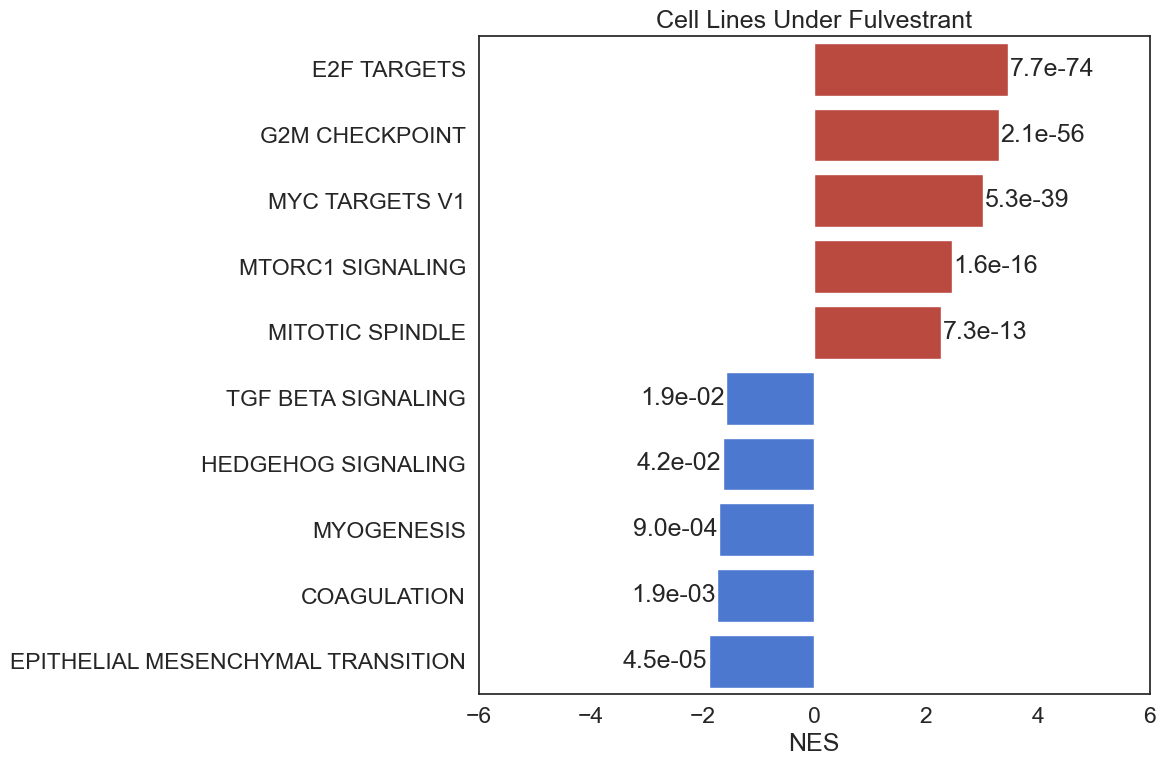

In [63]:

fig, axes = plt.subplots(ncols=1,figsize=(12,8))


rounded_pvals3 = ['{:0.1e}'.format(i) for i in list(paths_in_treated_exp['padj'])]

snsplot = sns.barplot(data=paths_in_treated_exp, x='NES' , y='pathway',palette=only_rd_blue_palette_tx,ax=axes)

#snsplot.set(yticklabels=[])
snsplot.set(ylabel=None)

snsplot.set_xlim(-6,6)
for container in snsplot.containers:
    snsplot.bar_label(container, labels=rounded_pvals3, label_type='edge',padding=1)
#snsplot3.margins(y=0.01)
sns.set_style('white')
snsplot.set(title='Cell Lines Under Fulvestrant')
fig.tight_layout()
fig.savefig('CellLines_UnderTX_GSEA_plots_111523.svg')